In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib qt

# Read and displaay the original image
img = mpimg.imread('./stop_sign.jpg')
plt.imshow(img)

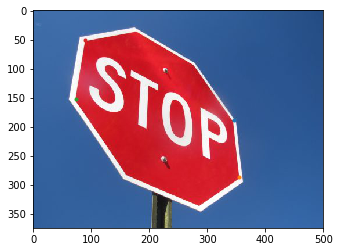

In [3]:
%matplotlib inline

# source image points
plt.imshow(img)
plt.plot(345, 189, '.') # top right
plt.plot(355, 287, '.') # bottom right
plt.plot(73, 152, '.') # bottom left
plt.plot(88, 51, '.') # top left

In [8]:
# Define perspective transform function
def warp(img):
    # Define calibration box in source(original) and destination (warped) corordinates
    img_size = (img.shape[0], img.shape[1])
    
    # Four source coordinates
    src = np.float32(
            [[345, 189],
             [355, 287],
             [73, 152],
             [88, 51]])
    # Four desired coordinates
    dst = np.float32(
            [[350, 90],
             [350, 200],
             [70, 200],
             [70, 90]])
    
    # Compute the perspective transform, M
    M = cv2.getPerspectiveTransform(src, dst)
    
    # Could compute the invert also by swapping the input parameters
    Minv = cv2.getPerspectiveTransform(dst, src)
    
    # Create warped image - uses linear interpolation
    warped = cv2.warpPerspective(img, M, img_size, flags=cv2.INTER_LINEAR)
    
    return warped

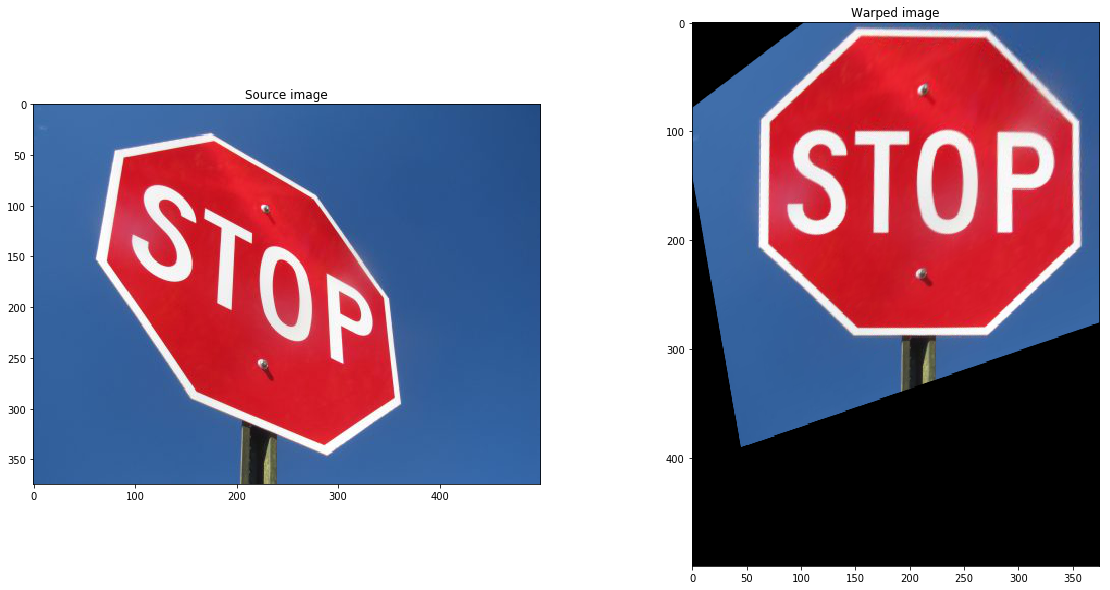

In [9]:
%matplotlib inline
warped_im = warp(img)

# Visualize undistortion
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))
ax1.set_title('Source image')
ax1.imshow(img)
ax2.set_title('Warped image')
ax2.imshow(warped_im)

In [7]:
warped_im